### The Bag-of-Words model

In a [bag-of-words model](https://en.wikipedia.org/wiki/Bag-of-words_model), we take each word that exists in our corpus, count its occurrences in each document, and make this count a feature to form the document-term matrix. So, each document is a row and each unique word in the corpus is a column.


The first step in any NLP task is  to _tokenize_ our data - this is splitting it into individual words, or tokens. A simple way to do this would be to just split each string on the whitespace between the words.

Let's start with a very simple corpus.

In [41]:
import pandas as pd
data = pd.read_csv('train_realornot.csv')
data.shape

(7613, 5)

In [5]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

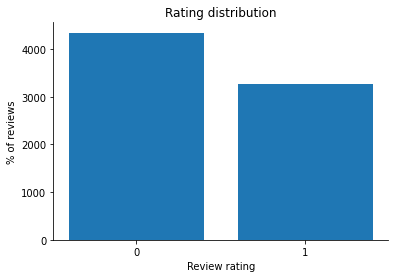

Class imbalance: [0.57 0.43]


In [10]:
values, counts = np.unique(data['target'], return_counts=True)
#normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0","1"], counts)
plt.xlabel('Review rating')
plt.ylabel('% of reviews')
sns.despine()
plt.title("Rating distribution")
plt.show()
print(f"Class imbalance: {np.round(normalized_counts, 2)}")

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(data["text"])

# 3. Transform
small_transformed = bagofwords.transform(data["text"])
small_transformed

<7613x21637 sparse matrix of type '<class 'numpy.int64'>'
	with 111497 stored elements in Compressed Sparse Row format>

In [23]:
#bagofwords.get_feature_names()

In [17]:
# converting the sparse matrix into a numpy array
small_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
my_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=small_transformed.toarray())
display(my_df)

,00,000,0000,007npen6lg,00cy9vxeff,00end,00pm,01,02,0215,...,ûò,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
### Bag-of-Words on the Reviews Data

In [26]:
# store simplified data in X and y
X = data['text']
y = data['target']

In [27]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# size of training data
X_train.shape

(5100,)

In [29]:
# 1. Instantiate
bagofwords = CountVectorizer()

# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)
X_train_transformed

<5100x16398 sparse matrix of type '<class 'numpy.int64'>'
	with 74814 stored elements in Compressed Sparse Row format>

In [30]:
# calculation of how many MB a dense matrix would take up
# 5714 sentences * 12530 terms * 8 bits in a byte / 1024b per kb / 1024 kb per Mb 
5100*12530 * 8/1024/1024

487.54119873046875

In [31]:
# how much memory does our sparse matrix take up?
(X_train_transformed.data.nbytes + X_train_transformed.indptr.nbytes + X_train_transformed.indices.nbytes)*8/1024/1024

7.005096435546875

In [32]:
X_test_transformed = bagofwords.transform(X_test)
X_test_transformed

<2513x16398 sparse matrix of type '<class 'numpy.int64'>'
	with 31076 stored elements in Compressed Sparse Row format>

In [33]:
words = bagofwords.get_feature_names()
some_indices = range(1, 12530, round(12530/10)) # just pick some indices

samples = [words[i] for i in some_indices]
print(samples)

['000', 'aidan', 'boxer', 'creates', 'emilee', 'glanders', 'instagram', 'ln', 'nfpa', 'pragnik']


In [34]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,000,aidan,boxer,creates,emilee,glanders,instagram,ln,nfpa,pragnik
total_corpus_count,2,1,2,1,1,1,3,1,1,1


Cool, we can see that summing up a column of our `X_train` document-term matrix gives how many times a token appeared in our overall corpus. 

Let's find the most frequently occurring words next.

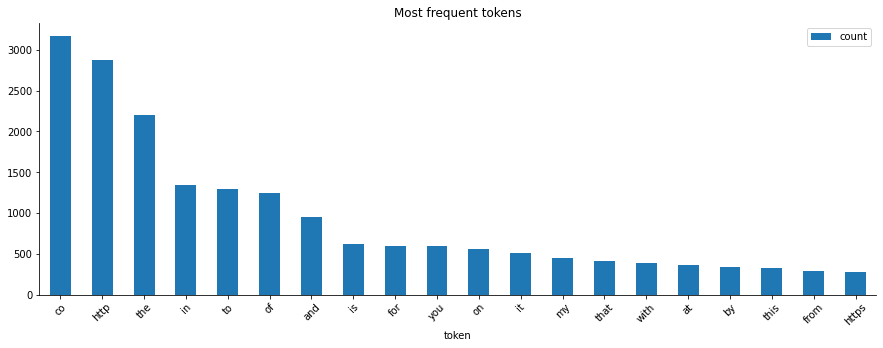

In [36]:
word_counts = X_train_transformed.toarray().sum(axis=0)

def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
plot_most_frequent(words, word_counts)

Unsuprisingly the most common tokens are words like 'co', 'http', and 'the.'
These common words are known as **stopwords** and are not really useful in understanding of the text. Fortunately, there is a quick solve for this.

#### Stopwords

Our goal is to remove very frequent words that do not have a lot of extra content or enrich our understanding of the text. These could be articles ('the'), prepositions ('ago'), pronouns ('her'), conjunctions ('or'), and simple verbs like 'be' and 'have'. These words are categorized as **stop words** and a common text processing step is to remove them completely. 

We will now use the same `CountVectorizer()` function, but add in an argument which takes away common stop words. You can also provide your own stop word collection as a list.

In [39]:
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train) 
X_test_transformed = bagofwords.transform(X_test) 

X_train_transformed.shape

(5100, 16131)

We have reduces the number of features from 16938 to 16131. What are the most common words now?

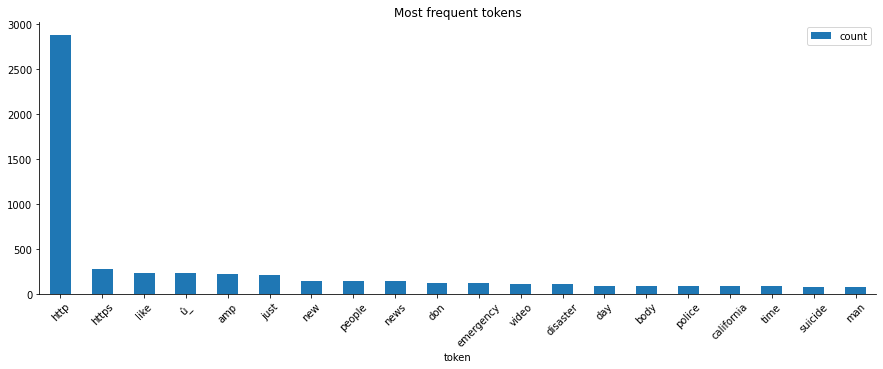

In [43]:
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_counts)

In [44]:
### Fitting a classifier

Next, let's fit a model - remember we have not done anything super complicated, just counted each word. For now we will use a Logistic Regression model to predict if a review is positive or negative.

In [46]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.8711764705882353
Test score: 0.7938718662952646


Not bad for a binary classification problem, although we definitely see some overfitting. Keep in mind that by random guessing we would have gotten slightly over 50% correctly (since there are more "bad" reviews than "good" ones), so we are doing better than just randomly guessing. So our model has learned something!

Let's look at the coefficients of our model

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matpl

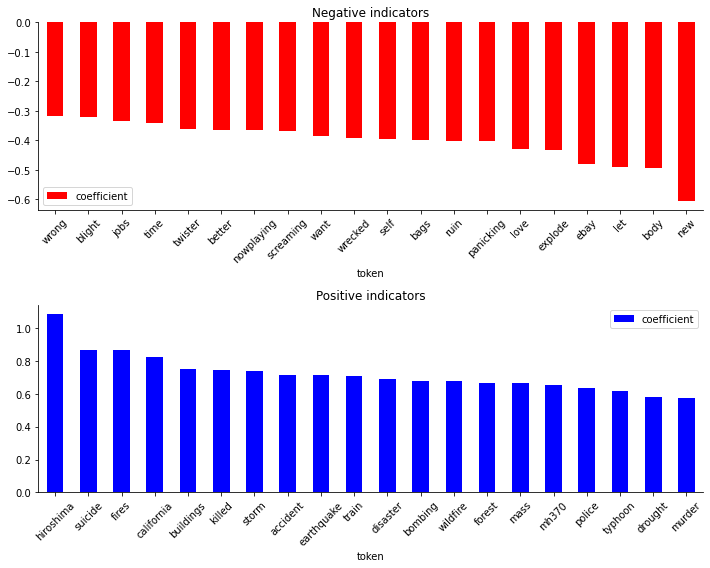

In [47]:
def plot_coefs(logreg, words):
    coef_df = pd.DataFrame({"coefficient": logreg.coef_[0], "token": words})
    coef_df = coef_df.sort_values("coefficient", ascending=False)

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # smallest coefficient -> tokens indicating negative sentiment 
    coef_df.tail(20).set_index("token").plot(kind="bar", rot=45, ax=axs[0], color="red")
    axs[0].set_title("Negative indicators")
 
    
    # largest coefficient -> tokens indicating positive sentiment 
    coef_df.head(20).set_index("token").plot(kind="bar", rot=45, ax=axs[1], color="blue")
    axs[1].set_title("Positive indicators")
    
    sns.despine()
    plt.tight_layout()
    plt.show()
    
plot_coefs(logreg, words)

In [48]:
bagofwords = CountVectorizer(stop_words="english", min_df=5)
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)

X_train_transformed.shape

(5100, 1853)

We have dropped the number of words down to 2197! That is a much bigger reduction. You can check that the `max_df` parameter does not make a huge difference here, especially after we removed the stop words already. The `max_features` parameter is still useful though:

In [49]:
bagofwords = CountVectorizer(stop_words="english",
                             min_df=5,
                             max_features=1000)
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)

X_train_transformed.shape

(5100, 1000)

These are huge improvements that could help us build better and faster models, especially when high dimensionality is a problem.

### Stemming and Lemmatization

In language, we often use variations on the same word or meaning: run, runs, running, ran, jogged, jogging, jogs......  These examples are all forms of the word 'run' in different tenses. We need to make the decision on whether the added context provided by the tenses is worth the additional complexity for our model. When working with more simple vectorization techniques and standard models such as logistic regression, the answer is often no.

- **stemming**: stemming is a heuristic (rules-based) way of cutting off 's', 'ing' and other endings to reduce words to a basic root form. There are various strategies for carrying this out and these are obviously language specific. Also, note that stemming does not guarantee that you end up with a meaningful word (laziness -> lazi).

- **lemmatization**: is a lexicographic look-up, where each word is mapped to a fixed, meaningful common root form (laziness -> lazy).  While its beneficial to map back to a meaningful common root form, lemmatization is a lot more complex. For example, the root form of a word can actually change depending on whether it is used as a verb or a noun.
    * A good example of this is the word *saw*:
        * *saw* (verb) -> *see* 
        * *saw* (noun) -> *saw*

We will look into stemming with the Porter Stemmer from [nltk](http://www.nltk.org/howto/stem.html), one of the most widely used NLP packages. 

In [53]:
import nltk

# Let's test it out
stemmer = nltk.stem.PorterStemmer()

[stemmer.stem(i) for i in ['run', 'runs', 'running', 'ran', 'jogged', 'jogging', 'jogs']]


['run', 'run', 'run', 'ran', 'jog', 'jog', 'jog']

We can see exactly what the `PorterStemmer()` function above. Let's now apply it to our data. `CountVectorizer`, has a tokenizer parameter where we can pass in our own function to tokenize and process the text

bagofwords = CountVectorizer(min_df=5, 
                             tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

In [56]:
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')], 
                             stop_words='english')
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

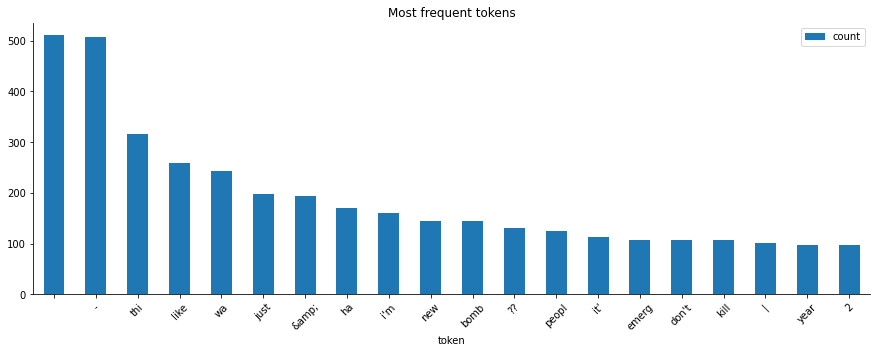

In [57]:
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_counts)

Notice this time we got some strange results such as punctuation marks, and some other unclear words. This is because our custom tokenizer lacked many features that the built-in one had, we only split the words into tokens and then stemmed them. 

In [61]:
### Custom Tokenizers 

By default, Sklearn vectorizers will perform basic tokenization for us including removal of punctuation (as best as it can) and lowercasing all text. However we can define our own function to do this and pass this in as an argument to the vectorizer. This allows us to incorporate more advanced techniques such as stemming or lemmatization or other NLP techniques

Lets go ahead and define our own function that will deal with punctuation prior to stemming. 


In [62]:
# the python string package has a helpful punctuation list
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [63]:
# a dummy sentence used for checking our process
sentence = "The quick brown fox, jumped over the lazy dog!!"

# after splitting the text based on spaces
split_sentence = sentence.split(' ')

# we stem and remove punctuation
tokenized_sentence = []
for word in split_sentence:
    for punctuation_mark in string.punctuation:
        word = word.replace(punctuation_mark, '')
    stemmed_word = stemmer.stem(word)
    tokenized_sentence.append(stemmed_word)
    
print(tokenized_sentence)

['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog']


Our final tokenizer will also remove stopwords.

In [65]:
# import the nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nandhini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
# checking tokenizer on simple sentence from above
my_tokenizer(sentence)

['quick', 'brown', 'fox', 'jump', 'lazi', 'dog']

In [67]:
bagofwords = CountVectorizer(min_df=5, 
                             tokenizer=my_tokenizer)
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

X_train_transformed.shape

(5100, 1821)

We have 2125 tokens now, but notice that the cell took a few seconds to run. So even a slightly more advanced bag-of-words model is already taking a bit more time to run.

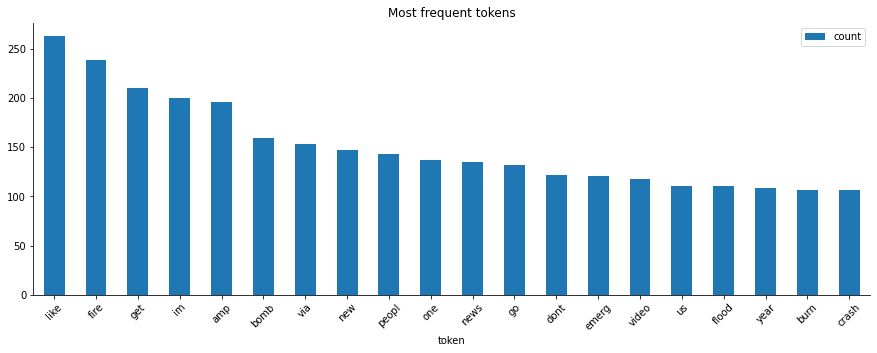

In [69]:
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_counts)

Our most common words might not make a lot of sense and some are cut off, but at least they are not stop words or punctuation. 

Let's see how our model will do. 

In [72]:
 #Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.8347058823529412
Test score: 0.7974532431356944


Not bad! We get clean tokens, much less features than before and the accuracy on the test set has actually improved ~2%.

### Adding N-grams to the vocabulary

As well as single words, we can start to put in multiple combinations of words into the bag. This will explode out feature space but should lead to better fitting models: "not great" is a lot more informative than "not" and "great" separately. Adding n-grams also helps to preserve some of the sequential nature of text data that is mostly lost in the bag-of-words model.


Two-grams in the following toy sentence:

`the turtle is not fast`

would be: 

`the turtle`

`turtle is`

`is not`

`not fast`


To do this in Python, we can pass an argument `ngram_range` into our vectorizer:

In [75]:
bagofwords = CountVectorizer(min_df=5,
                             tokenizer=my_tokenizer,
                             ngram_range=(1, 3))
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train)
X_test_transformed = bagofwords.transform(X_test)

X_train_transformed.shape

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(5100, 2820)

#### Exercise 3
Pull out the most frequent bigrams (2-grams) which were found by the vectorizer. 
Hint: they contain a space in the string.

## TF-IDF Vectorization

Using our `CountVectorizer` and `min_df`, we've only enforced that words that appear in less than 5 documents should be discarded, while all other words are kept. In essence we are saying that words that appear less frequently may not be so important.

There is, however, also the argument that words that appear infrequently are VERY important. Using either "good" or "bad" might be very common, but more uncommon words like "terrific" or "atrocious" should be given more weight.  

For this purpose we have the TF-IDF Vectorizer, which is composed of multiplying the following: 

1. **Term Frequency (TF)** - which is the number of times a given word appears in a document (review), this is the same as the content of our bag-of-words document-term matrix;
2. **Inverse Document Frequency (IDF)** - Inverse of the number of documents (reviews) a given word appears in.


Assuming we have a collection of tokens $[t_1, t_2, t_3, ..., t_n]$, and a collection of documents $D = [d_1, d_2, d_3, ... d_m]$ the overall formula for a TF-IDF score is:

$$TF(t_i, d_j) \times IDF(t_i, D)$$

Where:
* $TF(t_i, d_j)$ is the term frequency of term $i$ in document $j$. 
* $IDF(t_i, D)$ is the inverse document frequency of term $i$ in all documents. In the simplest case it is:


$$\frac{len(D)}{len(\{\text{all $d_k$ such that $t_i \in d_k$} \})+1}$$



In simple words, instead of our document-term matrix containing just the count of each token, it now contains a weight. 

- Words that are very common across documents are going to have their count be scaled down 
- Words that are less common across documents are going to have their count be scaled up

That way, when any model is trying to learn whether a word is predictive of sentiment, it will put more focus on the less common words.

In `sklearn`, we can use this vectorizer with the `TfidfVectorizer` function.

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
bagofwords = CountVectorizer().fit(data["text"])
small_transformed = bagofwords.transform(data["text"])

my_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=small_transformed.toarray())
display(my_df)

,00,000,0000,007npen6lg,00cy9vxeff,00end,00pm,01,02,0215,...,ûò,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
tfidf = TfidfVectorizer().fit(data["text"])
small_transformed = tfidf.transform(data["text"])

my_df = pd.DataFrame(columns=tfidf.get_feature_names(), data=small_transformed.toarray())
display(my_df)

,00,000,0000,007npen6lg,00cy9vxeff,00end,00pm,01,02,0215,...,ûò,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.417447,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.305284,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Notice that while for the `CountVectorizer` the word "absolutely" got a value of 1 for all three documents, the `TfidfVectorizer` gave it a higher value for a short review (it makes up a bigger part of that sentence).

Also notice that while for the `CountVectorizer`, the value for the word "period" is 1, the same value as for the words "movie", "beaten", and "have", the `TfidfVectorizer` gave it the highest value since it only appears in one document.

Now, looking at our reviews data:

In [84]:
# using our custom tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5,
                        tokenizer=my_tokenizer)
tfidf.fit(X_train)

X_train_transformed = tfidf.transform(X_train)
X_test_transformed = tfidf.transform(X_test)

X_train_transformed.shape

(5100, 1821)

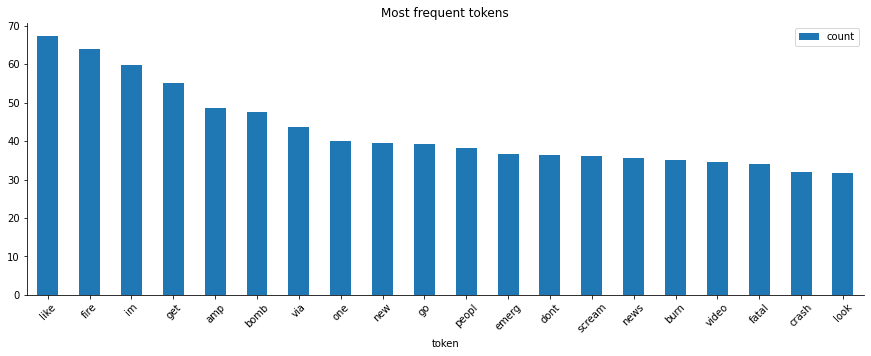

In [85]:
words = tfidf.get_feature_names()
word_weights = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_weights)

There is some difference in which tokens become more important compared to the `CountVectorizer`. You can rerun the model with this representation but note that you will need to tune the hyperparameters for good performance because we completely changed our data.

In [86]:
### (BONUS) Text Similarity

We used nearest neighbour models for classification and regression. Once we represented our text data as numeric vectors, we can use the same models to find similar documents. Let's see how this would work with TF-IDF and our reviews data.

We start by fitting a `NearestNeighbors` model that used solely for finding nearest neighbors by a specific metric (and not for predicting any class label or target value).

In [88]:
from sklearn.neighbors import NearestNeighbors

nn_model = NearestNeighbors(n_neighbors=1, metric="cosine")
nn_model.fit(X_train_transformed)

NearestNeighbors(metric='cosine', n_neighbors=1)

We then select a document from the test set, query its tf-idf vector with our `nn_model` and look up the closest training document.

In [95]:
idx = 12
print(f"Selected test document:\n {X_test.iloc[idx]}")

# use the nearest neighbour model to find the closest document by the tf-idf representation
dist, neighbour_ind = nn_model.kneighbors(X_test_transformed[idx])

print(f"\nClosest training neighbour:\n {X_train.iloc[neighbour_ind[0]].values[0]}")

Selected test document:
 @Zak_Bagans pets r like part of the family. I love animals.??? The last 2 pets I had I rescued! Breaks my heart when animals are mistreated????

Closest training neighbour:
 Last Chance Animal Rescue has 3 new posts. http://t.co/f1tcbg1MKi #animalrescue | https://t.co/Is2iDC3UBJ


### (BONUS) Topic modeling

**Topic modeling or topic clustering** is another example applied to text - think of how Google News clusters articles into sport, business, international, politics, etc. A common method is to use **Latent Dirchlet Allocation** (LDA, not to be confused with Linear Discriminant Analysis, which is also abbreviated as LDA), which is a type of unsupervised learning.
We could also use **Non-negative Matrix Factorization** (NMF). 

Both methods are available in sklearn and are demonstrated [here](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py).

Using what we learned about text processing, we can quickly run an example of LDA on the `newsgroup` dataset which contains emails from 20 categories.